In [1]:
from data import train
from sklearn.svm import SVR
import numpy as np
from multiprocessing import cpu_count
from utils import StandardizedGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [2]:
X=train.drop('sales', axis=1)
y=train.sales

In [5]:
#Random Forest and Bagging Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : (10,50,100)
              , 'criterion' : ('mse','mae')
              , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int),
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : (None,'auto','sqrt')
              , 'min_samples_split' : (2,4,6)
            #   , 'ccp_alpha' : (0.01,0.02,0.03,0.04)
             }
             #depth = 10,12,14

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': (None, 'auto', 'sqrt'),
                         'min_samples_split': (2, 4, 6),
                         'n_estimators': (10, 50, 100)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [6]:
RF_Grid.save('models/RF.p')

In [17]:
RF_Grid.results.head(10)

9         NaN          2                 100                  0.024534   
          10        auto         6                 100                  0.026529   
          9         NaN          2                 50                   0.017454   
                    auto         4                 100                  0.023437   
mae       9         auto         4                 100                  0.027626   
          7         NaN          2                 100                  0.024235   
mse       7         auto         6                 100                  0.027626   
mae       9         NaN          2                 100                  0.027626   

                                                                 std_score_time  \
criterion max_depth max_features min_samples_split n_estimators                   
mse       9         auto         6                 10                  0.003940   
          10        NaN          2                 50                  0.001956   
          9         NaN          2                 100                 0.002570   
          10        auto         6                 100                 0.002148   
          9         NaN          2                 50                  0.004992   
                    auto         4                 100                 0.001742   
mae       9         auto         4                 100                 0.005901   
          7         NaN          2                 100                 0.004113   
mse       7         auto         6                 100                 0.004113   
mae       9         NaN          2                 100                 0.006780   

                                                                 split0_test_neg_mean_squared_error  \
criterion max_depth max_features min_samples_split n_estimators                                       
mse       9         auto         6                 10                                   -860.536273   
          10        NaN          2                 50                                   -734.056890   
          9         NaN          2                 100                                  -753.284404   
          10        auto         6                 100                                  -687.489591   
          9         NaN          2                 50                                   -758.693731   
                    auto         4                 100                                  -766.625163   
mae       9         auto         4                 100                                  -994.323791   
          7         NaN          2                 100                                 -1066.018946   
mse       7         auto         6                 100                                  -767.617369   
mae       9         NaN          2                 100                                 -1108.864355   

                                                                 split1_test_neg_mean_squared_error  \
criterion max_depth max_features min_samples_split n_estimators                                       
mse       9         auto         6                 10                                  -1336.394031   
          10        NaN          2                 50                                  -1255.844751   
          9         NaN          2                 100                                 -1230.227345   
          10        auto         6                 100                                 -1264.764474   
          9         NaN          2                 50                                  -1223.618053   
                    auto         4                 100                                 -1181.513197   
mae       9         auto         4                 100                                 -1353.141048   
          7         NaN          2                 100                                 -1471.255911   
mse       7         auto         6                 100                   

In [23]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('n_estimators').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
n_estimators,,
10,1995.225769,3553.344928
50,1885.521058,3433.289327
100,1865.453537,3389.822104


In [22]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,2175.179452,3584.114613
mse,1655.620791,3333.522959


In [21]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_features').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_features,,
auto,1107.933597,2835.123846
sqrt,3524.229510,4715.244002


criterion
mae    AxesSubplot(0.125,0.125;0.775x0.755)
mse    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_test_neg_mean_squared_error, dtype: object

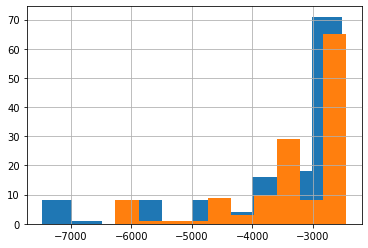

In [15]:
RF_Grid.results['mean_test_neg_mean_squared_error'].groupby('criterion').hist()